<a href="https://colab.research.google.com/github/sadmam-sobhan-76/HR-Recruitment-Expert-System/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2nd attempt

In [163]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [164]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
# Load data from CSV file stored in Google Colab
data_path = '/CVData11.csv'
df = pd.read_csv(data_path)

In [166]:
# Define stopwords list (optional)
stop_words = set(stopwords.words('english'))  # Download NLTK stopwords first

In [167]:
# Define function for text preprocessing
def preprocess_text(text):
  """
  This function preprocesses resume text for further analysis.

  Args:
      text: The resume text string.

  Returns:
      A list of cleaned and stemmed tokens.
  """
  # Lowercase text
  text = text.lower()

  # Remove punctuation
  text = ''.join([char for char in text if char.isalnum() or char.isspace()])

  # Remove stopwords (optional)
  tokens = word_tokenize(text)
  if stop_words:
    tokens = [word for word in tokens if word not in stop_words]

  # Stemming (optional)
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(word) for word in tokens]

  return stemmed_tokens

# Apply preprocessing to 'Resume' column
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)

# Print a sample of preprocessed resumes (optional)
print(df[['Resume', 'cleaned_resume']].head())

                                              Resume  \
0  Skills * Programming Languages: Python (pandas...   
1  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Areas of Interest Deep Learning, Control Syste...   
3  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                      cleaned_resume  
0  [skill, program, languag, python, panda, numpi...  
1  [educ, detail, may, 2013, may, 2017, uitrgpv, ...  
2  [area, interest, deep, learn, control, system,...  
3  [skill, â, r, â, python, â, sap, hana, â, tabl...  
4  [educ, detail, mca, ymcaust, faridabad, haryan...  


In [168]:
import spacy

In [169]:
def extract_skills(tokens):
  doc = nlp(' '.join(tokens))  # Create a spaCy Doc object from the list of tokens
  skills = []
  for ent in doc.ents:
    if ent.label_ == "ORG":  # Modify label for skills if needed
      skills.append(ent.text)
  return skills

# Example usage
resume_tokens = df['cleaned_resume'].iloc[0]
extracted_skills = extract_skills(resume_tokens)
print(f"Extracted Skills: {extracted_skills}")

Extracted Skills: ['associ data', 'gener', 'issu', 'project usa client', 'analyt motor vehicl', 'advanc analyt tool technolog']


In [170]:
def match_skills(resume_text, job_title):
  """
  This function compares the preprocessed resume text with the job title
  and returns a score based on matching keywords.

  Args:
      resume_text: List of tokens from preprocessed resume.
      job_title: The job title string.

  Returns:
      A score (integer) indicating the number of matching keywords.
  """
  job_title_tokens = preprocess_text(job_title)
  match_count = sum(token in resume_text for token in job_title_tokens)
  return match_count


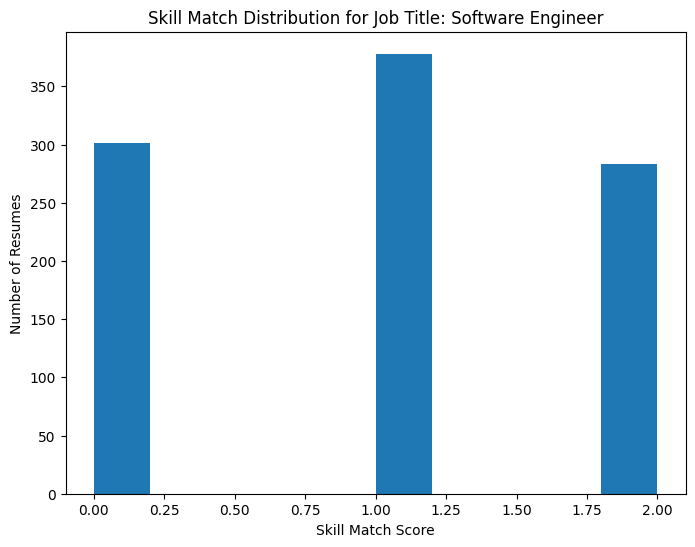

In [171]:
# Define a sample job title (replace with your actual job title)
job_title = "Software Engineer"

# Calculate skill match score for each resume
df['skill_match_score'] = df['cleaned_resume'].apply(lambda x: match_skills(x, job_title))

# Group resumes by job title (optional for plotting by category)
# job_title_groups = df.groupby('Job Title')

# Plot skill match score distribution (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['skill_match_score'])
plt.xlabel('Skill Match Score')
plt.ylabel('Number of Resumes')
plt.title(f"Skill Match Distribution for Job Title: {job_title}")
plt.show()


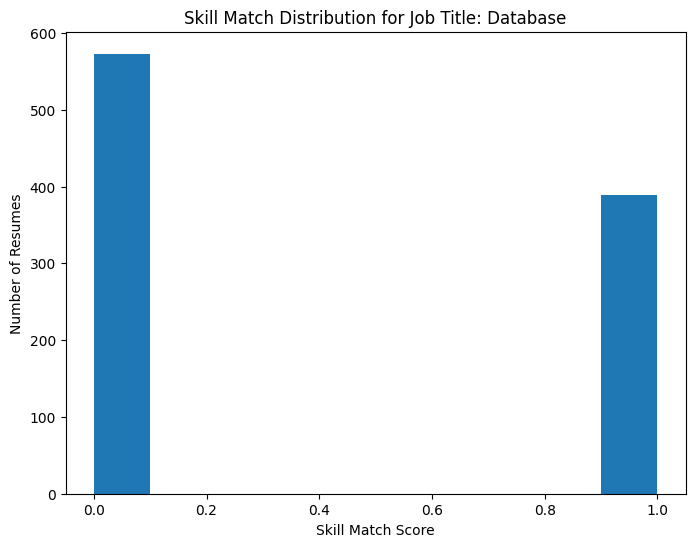

In [173]:
#Define a sample job title (replace with your actual job title)
job_title = "Database"

# Calculate skill match score for each resume
df['skill_match_score'] = df['cleaned_resume'].apply(lambda x: match_skills(x, job_title))

# Group resumes by job title (optional for plotting by category)
# job_title_groups = df.groupby('Job Title')

# Plot skill match score distribution (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['skill_match_score'])
plt.xlabel('Skill Match Score')
plt.ylabel('Number of Resumes')
plt.title(f"Skill Match Distribution for Job Title: {job_title}")
plt.show()